predict rain tomorrow

- add normalization
- include location
- split test data

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package


|Heading   |Meaning   |Units   |
|---|---|---|
|Date|Day of the month|-|
|Day|Day of the week|first two letters|
|Temps Min|Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree.|degrees Celsius|
|Temps Max|Maximum temperature in the 24 hours from 9am. Sometimes only known to the nearest whole degree.|degrees Celsius|
|Rain|Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimetre.|millimetres|
|Evap|"Class A" pan evaporation in the 24 hours to 9am|millimetres|
|Sun|Bright sunshine in the 24 hours to midnight|hours|
|Max wind gust Dirn|Direction of strongest gust in the 24 hours to midnight|16 compass points|
|Max wind gust Spd|Speed of strongest wind gust in the 24 hours to midnight|kilometres per hour|
|Max wind gust Time|Time of strongest wind gust|local time hh:mm|
|9 am Temp|Temperature at 9 am|degrees Celsius|
|9 am RH|Relative humidity at 9 am|percent|
|9 am Cld|Fraction of sky obscured by cloud at 9 am|eighths|
|9 am Dirn|Wind direction averaged over 10 minutes prior to 9 am|compass points|
|9 am Spd|Wind speed averaged over 10 minutes prior to 9 am|kilometres per hour|
|9 am MSLP|Atmospheric pressure reduced to mean sea level at 9 am|hectopascals|
|3 pm Temp|Temperature at 3 pm|degrees Celsius|
|3 pm RH|Relative humidity at 3 pm|percent|
|3 pm Cld|Fraction of sky obscured by cloud at 3 pm|eighths|
|3 pm Dirn|Wind direction averaged over 10 minutes prior to 3 pm|compass points|
|3 pm Spd|Wind speed averaged over 10 minutes prior to 3 pm|kilometres per hour|
|3 pm MSLP|Atmospheric pressure reduced to mean sea level at 3 pm|hectopascals|


In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from dataprep.eda import create_report
from pycaret.classification import *
from pycaret.utils import check_metric
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

NumExpr defaulting to 8 threads.


In [2]:
df = pd.read_csv('G:/data-extract/weatherAUS.csv')

In [3]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
#convert object to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [8]:
#create_report(df=df, title='Original').show_browser()

In [9]:
#df[(df['Location'] == 'Albury') & (df['WindSpeed9am'].isna())]

In [10]:
#df[(df['Location'] == 'Albury') & (df['Date'] >= '2010-02-01') & (df['Date'] <= '2010-02-20')][['Date','WindSpeed9am']]

In [7]:
def fillWithAvg(columnname):
    for idx in df[(df[columnname].isna()) | (df[columnname] == 0)].index:
        #print(idx)
        #print(df.iloc[idx]['Location'])
        #print(df.iloc[idx])
        #print(df.iloc[idx-1])
        #print(df.iloc[idx-2])
        #print(df.iloc[idx-3])
        #print(df[columnname][idx-1] , df[columnname][idx-2] , df[columnname][idx-3])
        #avg 3 previous
        if (idx-1 >= 0):
            v1 = df[columnname][idx-1]
        else:
            v1 = 0

        if (idx-2 >= 0):
            v2 = df[columnname][idx-2]
        else:
            v2 = 0

        if (idx-3 >= 0):
            v3 = df[columnname][idx-3]
        else:
            v3 = 0

        #print(v1, v2, v3)
        avg = (v1 + v2 + v3)/3
        #print(avg)
        #print("\n")
        df.at[idx, columnname] = avg
        #break

In [8]:
def fillWithPrevValue(columnname):
    for idx in df[df[columnname].isna()].index:
        if (idx-1 >= 0):
            val = df[columnname][idx-1]
        else:
            val = 0

        df.at[idx, columnname] = val
        #break

handle missing value column

In [9]:
fillWithAvg('Evaporation')
fillWithAvg('MinTemp')
fillWithAvg('MaxTemp')
fillWithAvg('Rainfall')
fillWithAvg('Evaporation')
fillWithAvg('Sunshine')
fillWithAvg('WindGustSpeed')
fillWithAvg('WindSpeed9am')
fillWithAvg('WindSpeed3pm')
fillWithAvg('Humidity9am')
fillWithAvg('Humidity3pm')
fillWithAvg('Pressure9am')
fillWithAvg('Pressure3pm')
fillWithAvg('Temp9am')
fillWithAvg('Temp3pm')

fillWithPrevValue('WindGustDir')
fillWithPrevValue('WindDir9am')
fillWithPrevValue('WindDir3pm')
fillWithPrevValue('Cloud9am')
fillWithPrevValue('Cloud3pm')

fillWithPrevValue('WindGustDir')
fillWithPrevValue('WindDir9am')
fillWithPrevValue('WindDir3pm')
fillWithPrevValue('Cloud9am')
fillWithPrevValue('Cloud3pm')

In [10]:
df[df['Evaporation'] == 0]['Sunshine']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6044    0.0
6045    0.0
6046    0.0
6047    0.0
6048    0.0
Name: Sunshine, Length: 6049, dtype: float64

In [15]:
#create_report(df=df, title='After Fill').show_browser()

remove target na

In [11]:
df.drop(df[(df['RainToday'].isna()) | (df['RainTomorrow'].isna())].index, inplace=True)

In [12]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01   Albury     13.4     22.9  0.600000          0.0   
1      2008-12-02   Albury      7.4     25.1  0.200000          0.0   
2      2008-12-03   Albury     12.9     25.7  0.266667          0.0   
3      2008-12-04   Albury      9.2     28.0  0.355556          0.0   
4      2008-12-05   Albury     17.5     32.3  1.000000          0.0   
...           ...      ...      ...      ...       ...          ...   
145454 2017-06-20    Uluru      3.5     21.8  7.966669          7.8   
145455 2017-06-21    Uluru      2.8     23.4  7.966662          7.8   
145456 2017-06-22    Uluru      3.6     25.3  7.966669          7.8   
145457 2017-06-23    Uluru      5.4     26.9  7.966667          7.8   
145458 2017-06-24    Uluru      7.8     27.0  7.966666          7.8   

         Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0        0.000000           W           44.0          W        WNW   
1        0.000000         WNW           44.0        NNW        WSW   
2        0.000000         WSW           46.0          W        WSW   
3        0.000000          NE           24.0         SE          E   
4        0.000000           W           41.0        ENE         NW   
...           ...         ...            ...        ...        ...   
145454  10.716667           E           31.0        ESE          E   
145455  10.716667           E           31.0         SE        ENE   
145456  10.716667         NNW           22.0         SE          N   
145457  10.716667           N           37.0         SE        WNW   
145458  10.716667          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       0.0     16.9     21.8        No   
1            1007.8       8.0       0.0     17.2     24.3        No   
2            1008.7       8.0       2.0     21.0     23.2        No   
3            1012.8       8.0       2.0     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145454       1021.2       8.0       7.0      9.4     20.9        No   
145455       1020.3       8.0       7.0     10.1     22.4        No   
145456       1019.1       8.0       7.0     10.9     24.5        No   
145457       1016.8       8.0       7.0     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145454           No  
145455           No  
145456           No  
145457           No  
145458           No  

[140787 rows x 23 columns]

split date

In [13]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.week
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter

In [19]:
df[df['Location']=='BadgerysCreek']['month']

3040    1
3041    1
3042    1
3043    1
3044    1
       ..
6044    6
6045    6
6046    6
6047    6
6048    6
Name: month, Length: 2877, dtype: int64

change target to int

In [14]:
df['RainTomorrow'] = (df['RainTomorrow'] == 'Yes').astype(int)
df['RainToday'] = (df['RainToday'] == 'Yes').astype(int)

if sunshine = 0, sunshine = avg(curr month)

In [15]:
month = 0
avg = 0
for idx in df[df['Sunshine']==0].index:
    if (month != df['month'][idx]):
        month = df['month'][idx]
        avg = df[(df['month'] == month) & (df['Sunshine']>0)]['Sunshine'].mean()
    #print(month, avg)
    #break
    df.at[idx, 'Sunshine'] = avg

In [16]:
month = 0
avg = 0
for idx in df[df['Evaporation']==0].index:
    if (month != df['month'][idx]):
        month = df['month'][idx]
        avg = df[(df['month'] == month) & (df['Evaporation']>0)]['Evaporation'].mean()
    #print(month, avg)
    #break
    df.at[idx, 'Evaporation'] = avg

In [17]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01   Albury     13.4     22.9  0.600000     7.541513   
1      2008-12-02   Albury      7.4     25.1  0.200000     7.541513   
2      2008-12-03   Albury     12.9     25.7  0.266667     7.541513   
3      2008-12-04   Albury      9.2     28.0  0.355556     7.541513   
4      2008-12-05   Albury     17.5     32.3  1.000000     7.541513   
...           ...      ...      ...      ...       ...          ...   
145454 2017-06-20    Uluru      3.5     21.8  7.966669     7.800000   
145455 2017-06-21    Uluru      2.8     23.4  7.966662     7.800000   
145456 2017-06-22    Uluru      3.6     25.3  7.966669     7.800000   
145457 2017-06-23    Uluru      5.4     26.9  7.966667     7.800000   
145458 2017-06-24    Uluru      7.8     27.0  7.966666     7.800000   

         Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0        7.939100           W           44.0          W        WNW   
1        7.939100         WNW           44.0        NNW        WSW   
2        7.939100         WSW           46.0          W        WSW   
3        7.939100          NE           24.0         SE          E   
4        7.939100           W           41.0        ENE         NW   
...           ...         ...            ...        ...        ...   
145454  10.716667           E           31.0        ESE          E   
145455  10.716667           E           31.0         SE        ENE   
145456  10.716667         NNW           22.0         SE          N   
145457  10.716667           N           37.0         SE        WNW   
145458  10.716667          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       0.0     16.9     21.8          0   
1            1007.8       8.0       0.0     17.2     24.3          0   
2            1008.7       8.0       2.0     21.0     23.2          0   
3            1012.8       8.0       2.0     18.1     26.5          0   
4            1006.0       7.0       8.0     17.8     29.7          0   
...             ...       ...       ...      ...      ...        ...   
145454       1021.2       8.0       7.0      9.4     20.9          0   
145455       1020.3       8.0       7.0     10.1     22.4          0   
145456       1019.1       8.0       7.0     10.9     24.5          0   
145457       1016.8       8.0       7.0     12.5     26.1          0   
145458       1016.5       3.0       2.0     15.1     26.0          0   

        RainTomorrow  year  month  week  day  dayofweek  quarter  
0                  0  2008     12    49    1          0        4  
1                  0  2008     12    49    2          1        4  
2                  0  2008     12    49    3          2        4  
3                  0  2008     12    49    4          3        4  
4                  0  2008     12    49    5          4        4  
...              ...   ...    ...   ...  ...        ...      ...  
145454             0  2017      6    25   20          1     

change categorical to onehot

Location, WindGustDir, WindDir9am, WindDir3pm

drop original column

In [18]:
dfloc = pd.get_dummies(df['Location'])
dfloc.columns = 'LOC_'+dfloc.columns

dfwgd = pd.get_dummies(df['WindGustDir'])
dfwgd.columns = 'WGD_'+dfwgd.columns

dfwd9 = pd.get_dummies(df['WindDir9am'])
dfwd9.columns = 'WD9_'+dfwd9.columns

dfwd3 = pd.get_dummies(df['WindDir3pm'])
dfwd3.columns = 'WD3_'+dfwd3.columns

In [19]:
dfx = pd.concat([df, dfloc, dfwgd, dfwd9, dfwd3], axis=1)

In [20]:
dfx

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01   Albury     13.4     22.9  0.600000     7.541513   
1      2008-12-02   Albury      7.4     25.1  0.200000     7.541513   
2      2008-12-03   Albury     12.9     25.7  0.266667     7.541513   
3      2008-12-04   Albury      9.2     28.0  0.355556     7.541513   
4      2008-12-05   Albury     17.5     32.3  1.000000     7.541513   
...           ...      ...      ...      ...       ...          ...   
145454 2017-06-20    Uluru      3.5     21.8  7.966669     7.800000   
145455 2017-06-21    Uluru      2.8     23.4  7.966662     7.800000   
145456 2017-06-22    Uluru      3.6     25.3  7.966669     7.800000   
145457 2017-06-23    Uluru      5.4     26.9  7.966667     7.800000   
145458 2017-06-24    Uluru      7.8     27.0  7.966666     7.800000   

         Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0        7.939100           W           44.0          W        WNW   
1        7.939100         WNW           44.0        NNW        WSW   
2        7.939100         WSW           46.0          W        WSW   
3        7.939100          NE           24.0         SE          E   
4        7.939100           W           41.0        ENE         NW   
...           ...         ...            ...        ...        ...   
145454  10.716667           E           31.0        ESE          E   
145455  10.716667           E           31.0         SE        ENE   
145456  10.716667         NNW           22.0         SE          N   
145457  10.716667           N           37.0         SE        WNW   
145458  10.716667          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       0.0     16.9     21.8          0   
1            1007.8       8.0       0.0     17.2     24.3          0   
2            1008.7       8.0       2.0     21.0     23.2          0   
3            1012.8       8.0       2.0     18.1     26.5          0   
4            1006.0       7.0       8.0     17.8     29.7          0   
...             ...       ...       ...      ...      ...        ...   
145454       1021.2       8.0       7.0      9.4     20.9          0   
145455       1020.3       8.0       7.0     10.1     22.4          0   
145456       1019.1       8.0       7.0     10.9     24.5          0   
145457       1016.8       8.0       7.0     12.5     26.1          0   
145458       1016.5       3.0       2.0     15.1     26.0          0   

        RainTomorrow  year  month  week  day  dayofweek  quarter  \
0                  0  2008     12    49    1          0        4   
1                  0  2008     12    49    2          1        4   
2                  0  2008     12    49    3          2        4   
3                  0  2008     12    49    4          3        4   
4                  0  2008     12    49    5          4        4   
...              ...   ...    ...   ...  ...        ...      ...   
145454             0  2017      6    25   20         

In [21]:
dfx = dfx.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=0)

In [22]:
dfx

Date  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0      2008-12-01     13.4     22.9  0.600000     7.541513   7.939100   
1      2008-12-02      7.4     25.1  0.200000     7.541513   7.939100   
2      2008-12-03     12.9     25.7  0.266667     7.541513   7.939100   
3      2008-12-04      9.2     28.0  0.355556     7.541513   7.939100   
4      2008-12-05     17.5     32.3  1.000000     7.541513   7.939100   
...           ...      ...      ...       ...          ...        ...   
145454 2017-06-20      3.5     21.8  7.966669     7.800000  10.716667   
145455 2017-06-21      2.8     23.4  7.966662     7.800000  10.716667   
145456 2017-06-22      3.6     25.3  7.966669     7.800000  10.716667   
145457 2017-06-23      5.4     26.9  7.966667     7.800000  10.716667   
145458 2017-06-24      7.8     27.0  7.966666     7.800000  10.716667   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0                44.0          20.0          24.0         71.0         22.0   
1                44.0           4.0          22.0         44.0         25.0   
2                46.0          19.0          26.0         38.0         30.0   
3                24.0          11.0           9.0         45.0         16.0   
4                41.0           7.0          20.0         82.0         33.0   
...               ...           ...           ...          ...          ...   
145454           31.0          15.0          13.0         59.0         27.0   
145455           31.0          13.0          11.0         51.0         24.0   
145456           22.0          13.0           9.0         56.0         21.0   
145457           37.0           9.0           9.0         53.0         24.0   
145458           28.0          13.0           7.0         51.0         24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       0.0     16.9     21.8   
1            1010.6       1007.8       8.0       0.0     17.2     24.3   
2            1007.6       1008.7       8.0       2.0     21.0     23.2   
3            1017.6       1012.8       8.0       2.0     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145454       1024.7       1021.2       8.0       7.0      9.4     20.9   
145455       1024.6       1020.3       8.0       7.0     10.1     22.4   
145456       1023.5       1019.1       8.0       7.0     10.9     24.5   
145457       1021.0       1016.8       8.0       7.0     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RainTomorrow  year  month  week  day  dayofweek  quarter  \
0               0             0  2008     12    49    1          0        4   
1               0             0  2008     12    49    2          1        4   
2               0             0  2008     12    49    3          2        4   
3               0             0  2008     12    49    4          3        4   
4               0             0  2008     12    49    5          4        4   
...           ...           ...   ...    ...   ...  ...        ...      ...   
145454          0             0  2017      6    25   20          1        2   
145455          0             0  2017      6    25   21          2        2   
145456          0             0  2017      6    25   22          3        2   
145457          0             0  2017      6    25   23          4        2   
145458          0             0  2017      6    25   24          5        2   

        LOC_Adelaide  LOC_Albany  LOC_Albury  LOC_AliceSprings  \
0                  0           0           1                 0   
1                  0           0           1                 0   
2                  0           0           1                 0   
3                  0           0           1                 0   
4                  

Get Total Location

In [29]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [30]:
total_location = len(df.Location.unique())
print('Total Location ', total_location)

Total Location  49


Explore data in graph for location 'Albury'

In [31]:
dfc = df[df['Location']=='Albury']

In [32]:
def plot_data_column(dfx, columnname, charttype='line'):
    plt.figure(); 
    dfx[['Date', columnname]].plot(x='Date', y=columnname, kind=charttype)
    plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

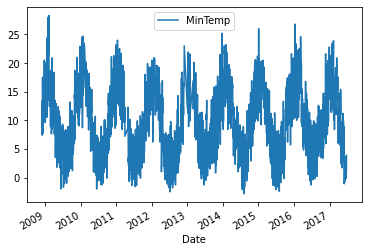

<Figure size 432x288 with 0 Axes>

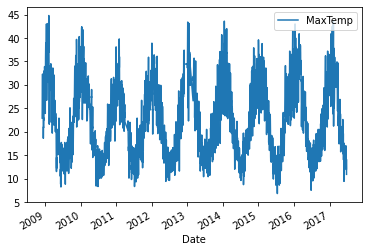

<Figure size 432x288 with 0 Axes>

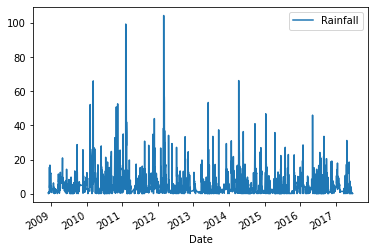

<Figure size 432x288 with 0 Axes>

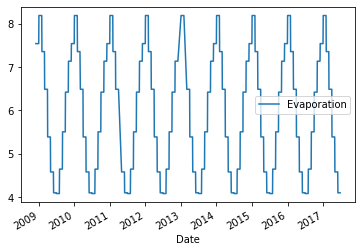

<Figure size 432x288 with 0 Axes>

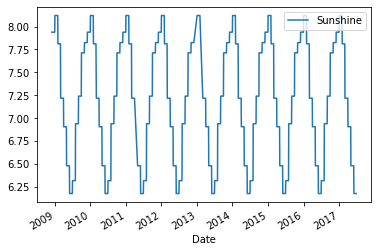

<Figure size 432x288 with 0 Axes>

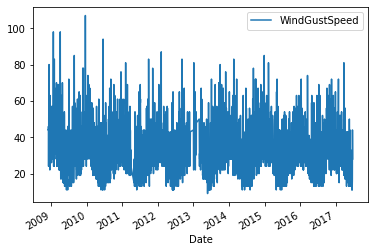

<Figure size 432x288 with 0 Axes>

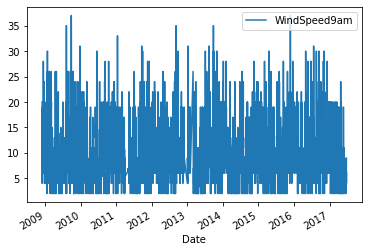

<Figure size 432x288 with 0 Axes>

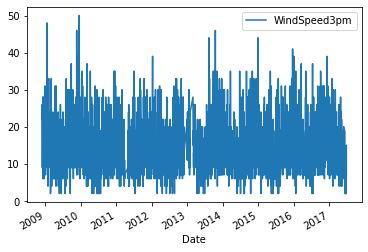

<Figure size 432x288 with 0 Axes>

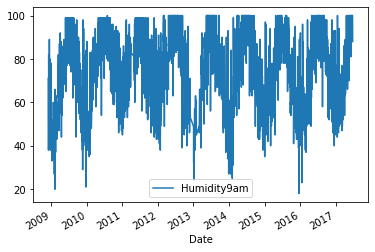

<Figure size 432x288 with 0 Axes>

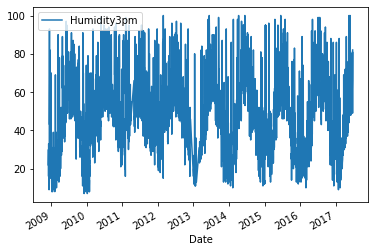

<Figure size 432x288 with 0 Axes>

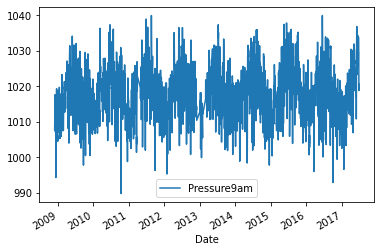

<Figure size 432x288 with 0 Axes>

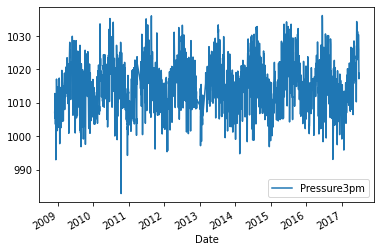

<Figure size 432x288 with 0 Axes>

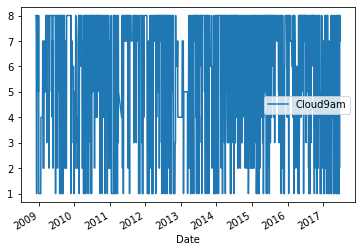

<Figure size 432x288 with 0 Axes>

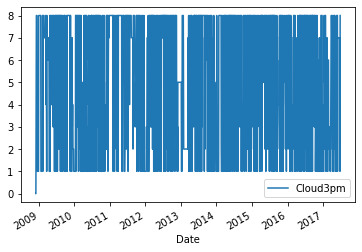

<Figure size 432x288 with 0 Axes>

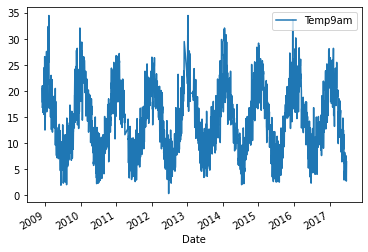

<Figure size 432x288 with 0 Axes>

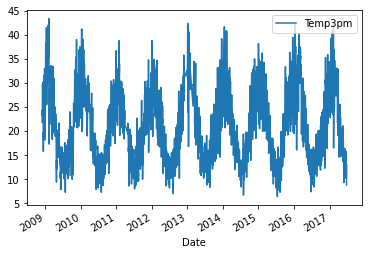

<Figure size 432x288 with 0 Axes>

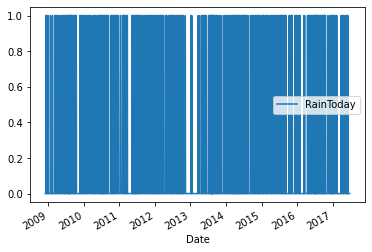

<Figure size 432x288 with 0 Axes>

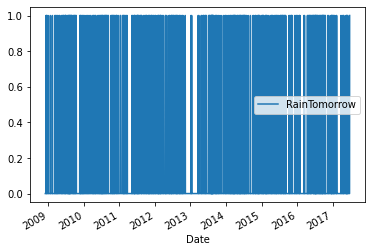

In [33]:
plot_data_column(dfc, 'MinTemp')
plot_data_column(dfc, 'MaxTemp')
plot_data_column(dfc, 'Rainfall')
plot_data_column(dfc, 'Evaporation')
plot_data_column(dfc, 'Sunshine')
plot_data_column(dfc, 'WindGustSpeed')
plot_data_column(dfc, 'WindSpeed9am')
plot_data_column(dfc, 'WindSpeed3pm')
plot_data_column(dfc, 'Humidity9am')
plot_data_column(dfc, 'Humidity3pm')
plot_data_column(dfc, 'Pressure9am')
plot_data_column(dfc, 'Pressure3pm')
plot_data_column(dfc, 'Cloud9am')
plot_data_column(dfc, 'Cloud3pm')
plot_data_column(dfc, 'Temp9am')
plot_data_column(dfc, 'Temp3pm')
plot_data_column(dfc, 'RainToday')
plot_data_column(dfc, 'RainTomorrow')

view data summary

In [23]:
dfx

Date  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0      2008-12-01     13.4     22.9  0.600000     7.541513   7.939100   
1      2008-12-02      7.4     25.1  0.200000     7.541513   7.939100   
2      2008-12-03     12.9     25.7  0.266667     7.541513   7.939100   
3      2008-12-04      9.2     28.0  0.355556     7.541513   7.939100   
4      2008-12-05     17.5     32.3  1.000000     7.541513   7.939100   
...           ...      ...      ...       ...          ...        ...   
145454 2017-06-20      3.5     21.8  7.966669     7.800000  10.716667   
145455 2017-06-21      2.8     23.4  7.966662     7.800000  10.716667   
145456 2017-06-22      3.6     25.3  7.966669     7.800000  10.716667   
145457 2017-06-23      5.4     26.9  7.966667     7.800000  10.716667   
145458 2017-06-24      7.8     27.0  7.966666     7.800000  10.716667   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0                44.0          20.0          24.0         71.0         22.0   
1                44.0           4.0          22.0         44.0         25.0   
2                46.0          19.0          26.0         38.0         30.0   
3                24.0          11.0           9.0         45.0         16.0   
4                41.0           7.0          20.0         82.0         33.0   
...               ...           ...           ...          ...          ...   
145454           31.0          15.0          13.0         59.0         27.0   
145455           31.0          13.0          11.0         51.0         24.0   
145456           22.0          13.0           9.0         56.0         21.0   
145457           37.0           9.0           9.0         53.0         24.0   
145458           28.0          13.0           7.0         51.0         24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       0.0     16.9     21.8   
1            1010.6       1007.8       8.0       0.0     17.2     24.3   
2            1007.6       1008.7       8.0       2.0     21.0     23.2   
3            1017.6       1012.8       8.0       2.0     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145454       1024.7       1021.2       8.0       7.0      9.4     20.9   
145455       1024.6       1020.3       8.0       7.0     10.1     22.4   
145456       1023.5       1019.1       8.0       7.0     10.9     24.5   
145457       1021.0       1016.8       8.0       7.0     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RainTomorrow  year  month  week  day  dayofweek  quarter  \
0               0             0  2008     12    49    1          0        4   
1               0             0  2008     12    49    2          1        4   
2               0             0  2008     12    49    3          2        4   
3               0             0  2008     12    49    4          3        4   
4               0             0  2008     12    49    5          4        4   
...           ...           ...   ...    ...   ...  ...        ...      ...   
145454          0             0  2017      6    25   20          1        2   
145455          0             0  2017      6    25   21          2        2   
145456          0             0  2017      6    25   22          3        2   
145457          0             0  2017      6    25   23          4        2   
145458          0             0  2017      6    25   24          5        2   

        LOC_Adelaide  LOC_Albany  LOC_Albury  LOC_AliceSprings  \
0                  0           0           1                 0   
1                  0           0           1                 0   
2                  0           0           1                 0   
3                  0           0           1                 0   
4                  

In [36]:
#create_report(df=dfx, title='After Fill').show_browser()

create model

In [24]:
data = dfx.drop(columns=['Date'], axis=0)

In [27]:
test_data = dfx[dfx['year']==2017]

In [28]:
train_data = dfx[dfx['year']<2017]

In [30]:

clf101 = setup(data = train_data, target = 'RainTomorrow', normalize=True, session_id=123)

create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='RainTomorrow',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dumm

In [43]:
best_model = compare_models()

create_model_container: 13
master_model_container: 13
display_container: 2
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
compare_models() succesfully completed......................................


In [44]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [31]:
lightgbm = create_model('lightgbm')

create_model_container: 1
master_model_container: 1
display_container: 2
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
create_model() succesfully completed......................................


In [32]:
tuned_lightgbm = tune_model(lightgbm)

create_model_container: 2
master_model_container: 2
display_container: 3
LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
tune_model() succesfully completed......................................


In [33]:
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


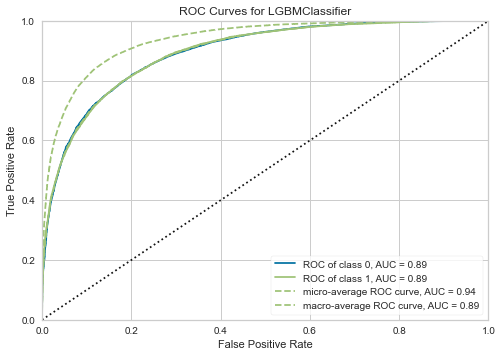

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [34]:
plot_model(tuned_lightgbm, plot = 'auc')

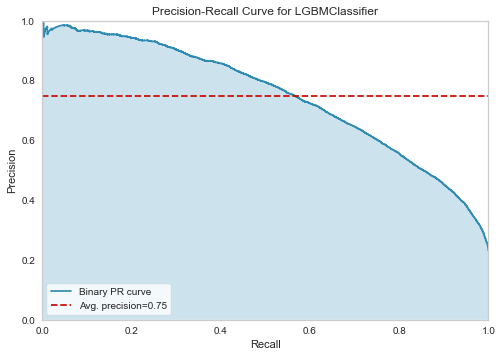

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [35]:
plot_model(tuned_lightgbm, plot = 'pr')

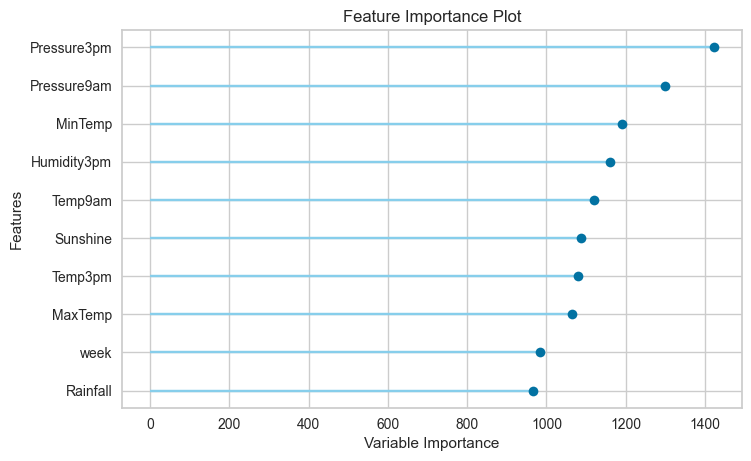

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [36]:
plot_model(tuned_lightgbm, plot='feature')

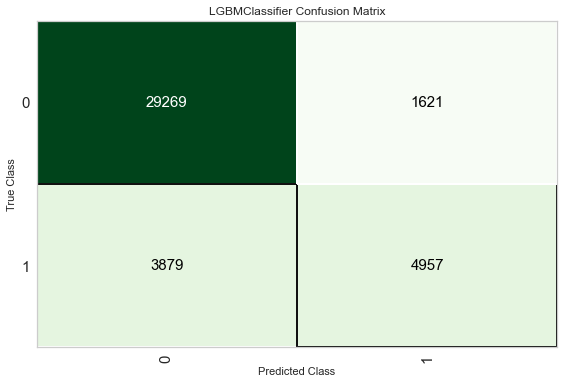

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [37]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [38]:
evaluate_model(tuned_lightgbm)

Initializing evaluate_model()
evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [39]:
pm = predict_model(tuned_lightgbm)

Initializing predict_model()
predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


In [40]:
pm

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     -1.629988 -1.494756 -0.550369    -0.666831 -1.244216       0.105905   
1     -1.049587 -0.536673 -0.500598    -0.464647 -0.780388      -1.530410   
2     -0.014277  0.210069  0.285716    -0.625205  0.286415      -0.340363   
3      0.362200  0.520037 -0.450503    -0.226784  0.739936      -0.340363   
4     -0.014277 -0.607120  0.243912     0.022972  1.265607       2.411621   
...         ...       ...       ...          ...       ...            ...   
39721 -0.500559 -0.677567 -0.297168    -0.619258 -1.641046      -0.191607   
39722 -0.359380 -0.353510 -0.257739    -0.464647 -0.780388      -0.129625   
39723 -2.273135 -0.832551 -0.469974    -0.440861  0.121499       0.329039   
39724  0.126902 -0.578941 -0.464696    -0.547899 -0.280485      -1.307276   
39725 -1.677048 -1.607472 -0.150084    -0.684670 -0.466016      -2.274189   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0         -0.204515      0.130486    -0.143202    -0.258947  ...   
1         -0.930058     -1.140166     0.221927     0.124691  ...   
2          0.037333     -0.447083     0.221927    -0.354856  ...   
3          0.521028     -0.216055    -0.404007    -0.738494  ...   
4          2.697658      2.787303    -0.456168    -0.690540  ...   
...             ...           ...          ...          ...  ...   
39721     -1.292830      0.592541     0.743538     0.412420  ...   
39722      0.017179     -0.447083    -0.091040     0.748103  ...   
39723     -1.050982      1.285624     0.482732    -0.642585  ...   
39724     -0.446363     -1.140166    -0.195363     0.652193  ...   
39725     -1.534678     -1.525212     1.525955     1.467424  ...   

       Date_month_9  Date_weekday_0  Date_weekday_2  Date_weekday_3  \
0               0.0             0.0             0.0             0.0   
1               0.0             1.0             0.0             0.0   
2               0.0             0.0             1.0             0.0   
3               0.0             0.0             0.0             1.0   
4               0.0             0.0             0.0             1.0   
...             ...             ...             ...             ...   
39721           0.0             1.0             0.0             0.0   
39722           0.0             0.0             1.0             0.0   
39723           0.0             0.0             1.0             0.0   
39724           0.0             0.0             0.0             0.0   
39725           0.0             0.0             0.0             0.0   

       Date_weekday_5  Date_is_month_end_1  Date_is_month_start_1  \
0                 1.0                  0.0                    0.0   
1                 0.0                  0.0                    0.0   
2                 0.0                  0.0                    0.0   
3                 0.0                  0.0                    0.0   
4                 0.0                  0.0                    0.0   
...               ...                  ...                    ...   
39721             0.0                  0.0                    0.0   
39722             0.0                  0.0                    0.0   
39723             0.0                  0.0                    0.0   
39724             0.0                  0.0                    0.0   
39725             0.0                  0.0                    0.0   

       RainTomorrow  Label   Score  
0                 0      0  0.9905  
1                 0      0  0.8702  
2                 0      0  0.9137  
3                 0      0  0.9679  
4                 0      0  0.9579  
...             ...    ...     ...  
39721             0      0  0.9248  
39722             1      0  0.7902  
39723             0      0  0.9588  
39724             0      0  0.5979  
39725             0      0  0.8284  

[39726 rows x 154 columns]

In [43]:
check_metric(pm['RainTomorrow'], pm['Label'], metric = 'Accuracy')

0.8616

In [41]:
final_lightgbm = finalize_model(tuned_lightgbm)

Initializing finalize_model()
finalize_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None)
Finalizing LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_j

In [42]:
unseen_predictions = predict_model(final_lightgbm, data=test_data)
unseen_predictions.head()

Initializing predict_model()
predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2864 2017-01-01     15.5     31.6  3.800000     8.190558  8.121287   
2865 2017-01-02     14.9     32.0  3.800000     8.190558  8.121287   
2866 2017-01-03     13.7     32.0  4.000000     8.190558  8.121287   
2867 2017-01-04     16.2     33.0  3.866667     8.190558  8.121287   
2868 2017-01-05     18.0     33.5  3.888889     8.190558  8.121287   

      WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  WD3_S  \
2864           39.0           9.0          24.0         63.0  ...      0   
2865           35.0           9.0           9.0         63.0  ...      0   
2866           24.0          13.0           6.0         51.0  ...      0   
2867           26.0          13.0           9.0         53.0  ...      0   
2868           35.0          11.0           7.0         48.0  ...      0   

      WD3_SE  WD3_SSE  WD3_SSW  WD3_SW  WD3_W  WD3_WNW  WD3_WSW  Label   Score  
2864       0        0        0       0      1        0        0      0  0.9800  
2865       0        0        0       0      0        1        0      0  0.9519  
2866       0        0        0       0      1        0        0      0  0.9861  
2867       0        0        0       0      0        0        0      0  0.9910  
2868       0        0        0       0      0        0        0      0  0.9606  

[5 rows x 124 columns]

In [44]:
check_metric(unseen_predictions['RainTomorrow'], unseen_predictions['Label'], metric = 'Accuracy')

0.862

In [46]:
save_model(final_lightgbm, 'g:/model-folder/weatheraus-210619-lightgbm')

Initializing save_model()
save_model(model=LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=g:/model-folder/weatheraus-210619-lightgbm, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_fea

(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='RainTomorrow',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.1,
       

In [ ]:
#saved_final_rf = load_model('g:/model-folder/weatheraus-210615b-lightgbm')

In [ ]:
#new_prediction = predict_model(saved_final_rf, data=data_unseen)

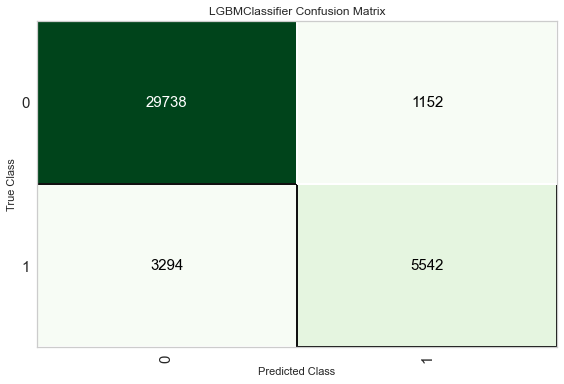

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [47]:
plot_model(final_lightgbm, plot = 'confusion_matrix')

In [50]:
unseen_predictions['Label']

2864      0
2865      0
2866      0
2867      0
2868      0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: Label, Length: 8369, dtype: int32

In [51]:
train_data['RainTomorrow']

0         0
1         0
2         0
3         0
4         0
         ..
145279    0
145280    0
145281    0
145282    0
145283    0
Name: RainTomorrow, Length: 132418, dtype: int32